In [1]:
from onedim.inputs import Inputs
from onedim.simulation import Simulation

In [6]:
#i = Inputs("tests/inputs.ini")
i = Inputs("problems/sodshocktube.ini")

In [7]:
s = Simulation(i)

Timestep:  0   Current time:  0.0
Timestep:  1   Current time:  0.000846847950629776
Timestep:  2   Current time:  0.001448354449639709
Timestep:  3   Current time:  0.002009379862477203
Timestep:  4   Current time:  0.002556985461956958
Timestep:  5   Current time:  0.0030971324238225997
Timestep:  6   Current time:  0.0036288331270029352
Timestep:  7   Current time:  0.0041473430462786185
Timestep:  8   Current time:  0.004656967401244307
Timestep:  9   Current time:  0.005161000237167517
Timestep:  10   Current time:  0.005661880860237828
Timestep:  11   Current time:  0.006161085082349732
Timestep:  12   Current time:  0.00665577504171141
Timestep:  13   Current time:  0.007146563713474487


/Users/chris/Documents/github/cfd/onedim/simulation.py:54: RuntimeWarning: divide by zero encountered in divide
  U_new = np.ones_like(self.grid.grid) / 0  # np.nans_like lol
/Users/chris/Documents/github/cfd/onedim/euler.py:19: RuntimeWarning: invalid value encountered in divide
  E = P / ((gamma - 1) * rho) + 0.5 * u**2
/Users/chris/Documents/github/cfd/onedim/euler.py:83: RuntimeWarning: invalid value encountered in divide
  e = P / ((gamma - 1) * rho)
/Users/chris/Documents/github/cfd/onedim/flux.py:74: RuntimeWarning: divide by zero encountered in divide
  U_new = np.ones_like(self.grid.grid) / 0  # np.nans_like lol
/Users/chris/Documents/github/cfd/onedim/euler.py:40: RuntimeWarning: invalid value encountered in divide
  prim[UCOMP] = a_cons[MCOMP] / a_cons[RHOCOMP]


Timestep:  14   Current time:  0.007634437885288479
Timestep:  15   Current time:  0.008119975528552956
Timestep:  16   Current time:  0.008603625030925436
Timestep:  17   Current time:  0.00908580767538487
Timestep:  18   Current time:  0.009566839486555019
Timestep:  19   Current time:  0.010046693113811225
Timestep:  20   Current time:  0.010524280744417356
Timestep:  21   Current time:  0.010999837344256039
Timestep:  22   Current time:  0.011473555198504064
Timestep:  23   Current time:  0.011945618646468148
Timestep:  24   Current time:  0.012416248944549917
Timestep:  25   Current time:  0.012885698203370034
Timestep:  26   Current time:  0.013354208070124867
Timestep:  27   Current time:  0.013821996726794461
Timestep:  28   Current time:  0.01428926178371269
Timestep:  29   Current time:  0.014755935253966838
Timestep:  30   Current time:  0.015221577181210106
Timestep:  31   Current time:  0.01568631523549126
Timestep:  32   Current time:  0.016150254342512563
Timestep:  33  

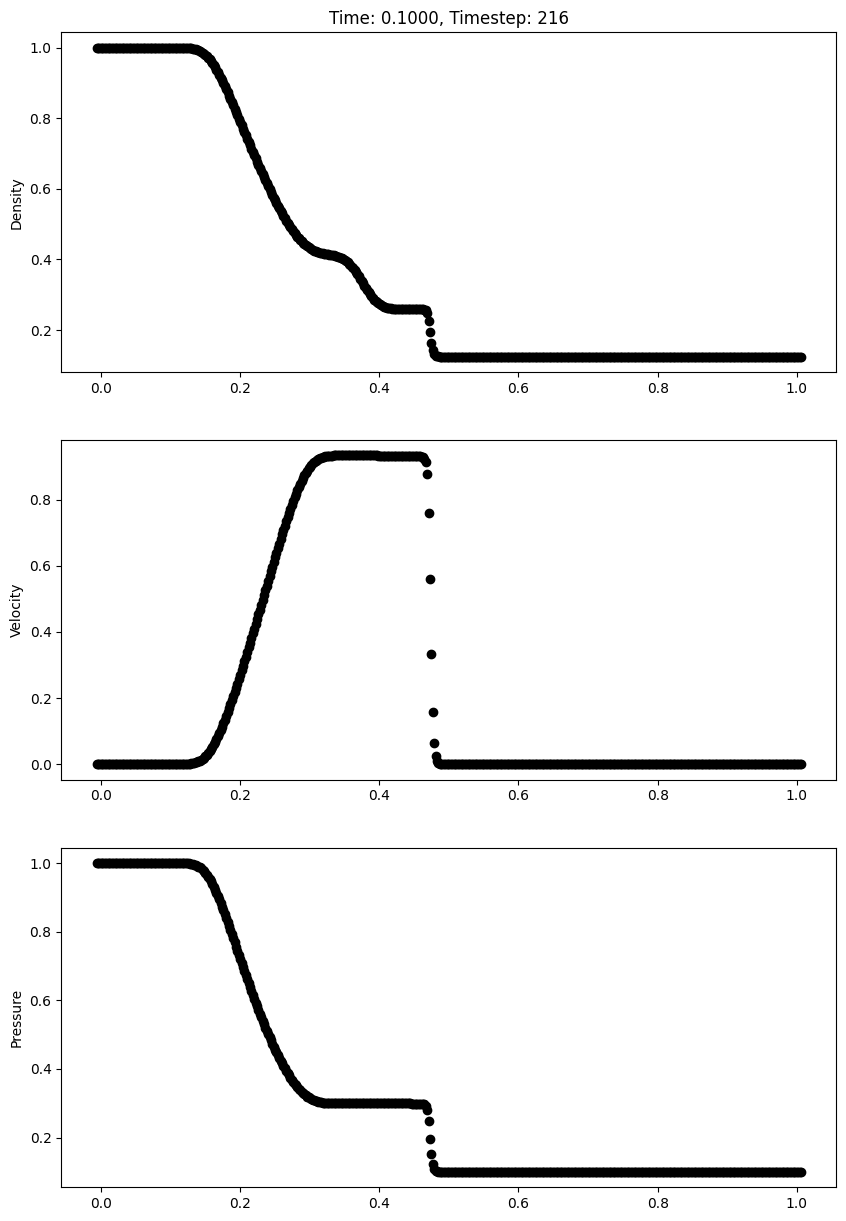

In [8]:
from onedim.constants import *

final_grid = s.run()



In [5]:

assert final_grid.variables == "prim"
rho = final_grid.grid[RHOCOMP,:]
u = final_grid.grid[UCOMP, :]
p = final_grid.grid[PCOMP,:]

In [10]:
import numpy as np

final_sol = np.vstack([rho, u, p])
np.savetxt("tests/solutions/sod_shock_tube.txt", final_sol)

In [11]:
loaded_matrix = np.loadtxt("tests/solutions/sod_shock_tube.txt")
rho_sol = loaded_matrix[RHOCOMP, :]
u_sol = loaded_matrix[UCOMP, :]
p_sol = loaded_matrix[PCOMP, :]

np.testing.assert_almost_equal(rho, rho_sol, decimal=6)
np.testing.assert_almost_equal(u, u_sol, decimal=6)
np.testing.assert_almost_equal(p, p_sol, decimal=6)
